14:18:09 - cmdstanpy - INFO - Chain [1] start processing
14:18:09 - cmdstanpy - INFO - Chain [1] done processing


Forecasting:  (24, 4)


/Users/krithikdhandapani/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


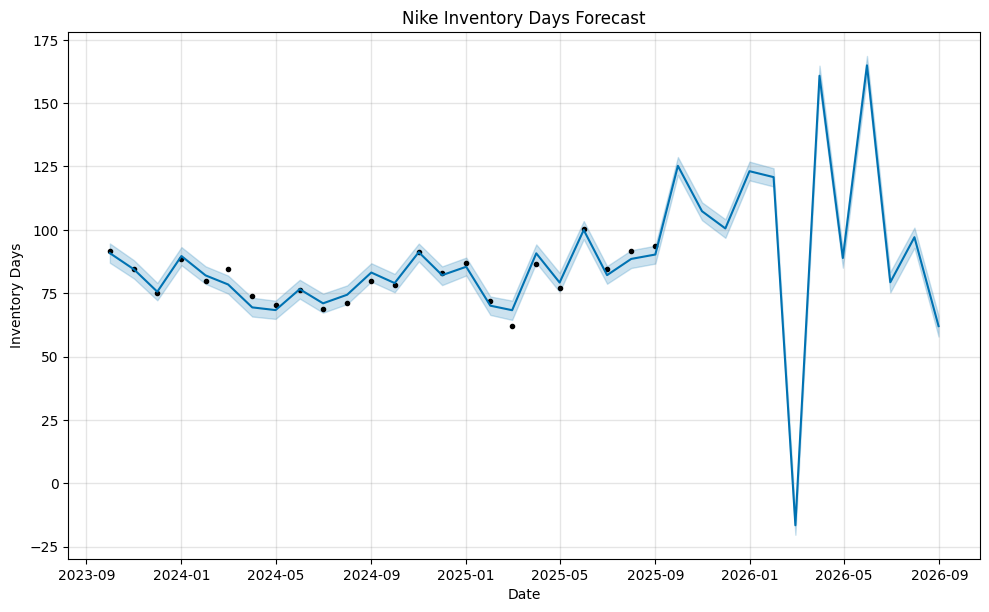

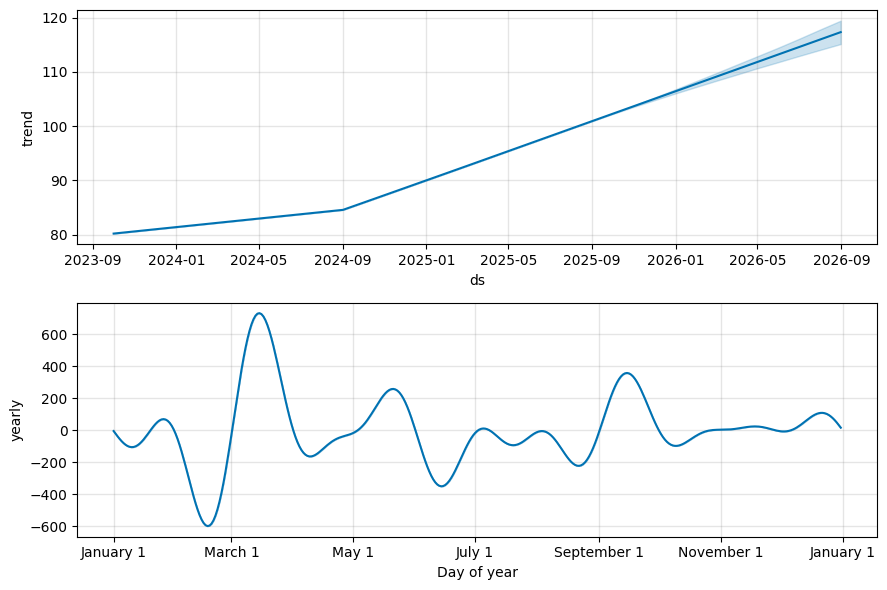

Forecast saved


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Loading model prediction data
data_path = "../data/processed/model_predictions_inventory.csv"
df = pd.read_csv(data_path)
df["date"] = pd.to_datetime(df["date"])

print("Forecasting: ", df.shape)

forecast_df = df[["date", "actual_inventory"]].rename(columns={"date" : "ds", "actual_inventory" : "y"})

# Initialize and fit model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.05
)

model.fit(forecast_df)

# Future Dataframe
future = model.make_future_dataframe(periods=12, freq="M")

# Generate Forecast
forecast = model.predict(future)

# Visualize Forecast
fig1 = model.plot(forecast)
plt.title("Nike Inventory Days Forecast")
plt.xlabel("Date")
plt.ylabel("Inventory Days")
plt.show()

# Trends and Seasonality
fig2 = model.plot_components(forecast)
plt.show()

# Save forecasting 
forecast[["ds","yhat", "yhat_lower", "yhat_upper"]].to_csv("../data/processed/nike_inventory_forecast.csv", index=False)
print("Forecast saved")